<a href="https://colab.research.google.com/github/merajsiddieque/ML-Lab/blob/main/ML_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('advertising.csv')

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


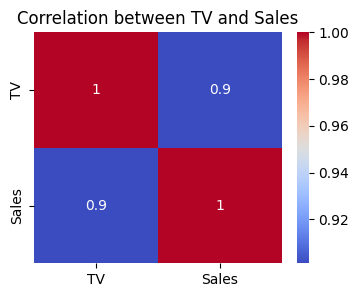

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(df[['TV','Sales']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between TV and Sales")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = df[['TV']]
y = df['Sales']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
y_pred = model.predict(X)

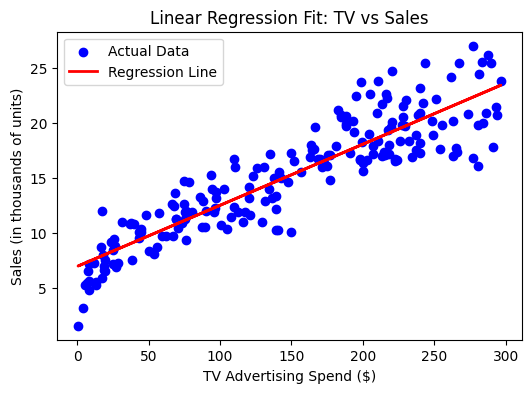

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X, y_pred, color='red', linewidth=2, label="Regression Line")
plt.title("Linear Regression Fit: TV vs Sales")
plt.xlabel("TV Advertising Spend ($)")
plt.ylabel("Sales (in thousands of units)")
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 5.22
R² Score: 0.81


In [ ]:
new_tv = pd.DataFrame({'TV': [50, 150, 250]})
predictions = model.predict(new_tv)

In [ ]:
for spend, pred in zip(new_tv['TV'], predictions):
    print(f"Predicted Sales for TV spend ${spend}: {pred:.2f}")

Predicted Sales for TV spend $50: 9.75
Predicted Sales for TV spend $150: 15.29
Predicted Sales for TV spend $250: 20.84


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('Housing.csv')

In [ ]:
df = df.apply(lambda col: col.map({'yes': 1, 'no': 0}) if col.dtypes == 'object' else col)

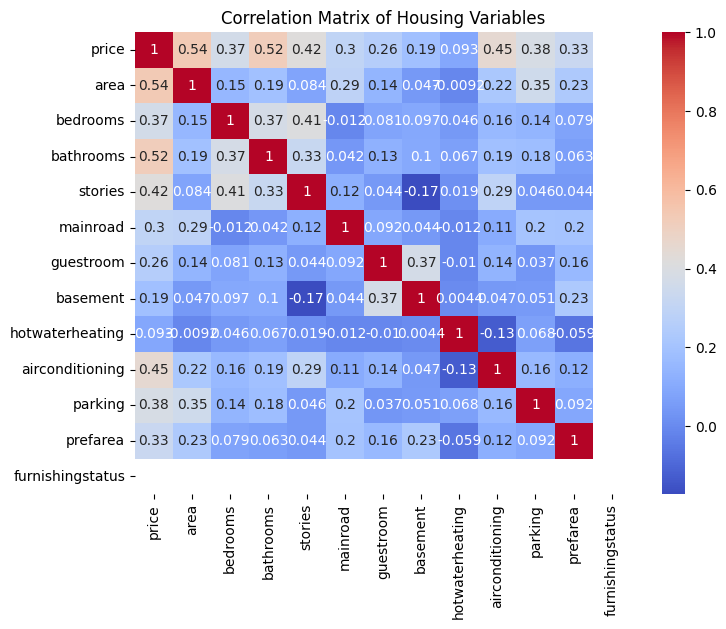

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Housing Variables")
plt.show()

In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
df.drop('furnishingstatus', axis=1 , inplace=True)

In [ ]:
X = df.drop(columns=['price'])  # All columns except target
y = df['price']

# 7. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Fit Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nModel Intercept:", model.intercept_)
print(coefficients)



Model Intercept: -72427.55025565159
            Feature   Coefficient
0              area  2.377105e+02
1          bedrooms  7.848365e+04
2         bathrooms  1.109326e+06
3           stories  4.269096e+05
4          mainroad  4.126778e+05
5         guestroom  2.436064e+05
6          basement  4.350055e+05
7   hotwaterheating  7.122647e+05
8   airconditioning  8.084154e+05
9           parking  2.474431e+05
10         prefarea  6.367877e+05


In [ ]:
y_pred = model.predict(X_test)

# 11. Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 1800793719718.97
R² Score: 0.64


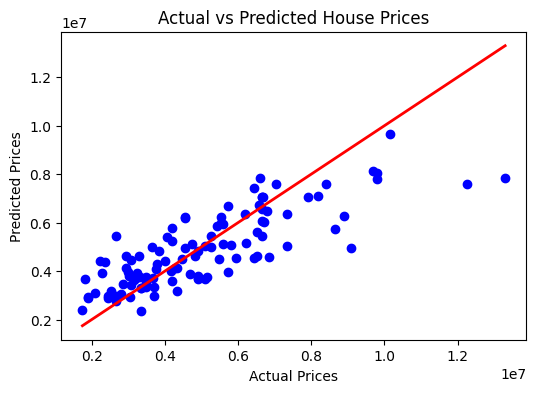

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()